# Machine Learning Practical No.4

Clustering Analysis

  Implement K-Means clustering on Iris.csv dataset. Determine the number of clusters using the elbow method.

In [46]:
# Step 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [47]:
df=pd.read_csv(r"D:\CL-1\ML\Iris.csv")#Loading the dataset
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [48]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [50]:
num_df = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [51]:
scaler = StandardScaler()
X = scaler.fit_transform(num_df)

In [52]:
num_df.shape

(150, 4)

In [53]:
X.shape

(150, 4)

c:\Users\lokes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lokes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lokes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lokes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

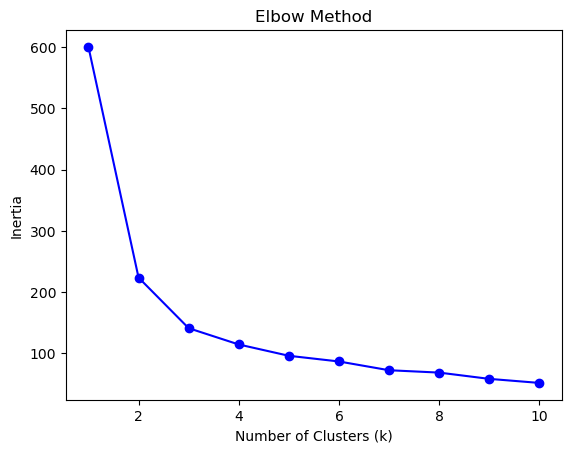

In [54]:
# Step 5: Elbow Method (Simplified)
inertia = []
K = range(1, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(X)
    inertia.append(model.inertia_)

plt.plot(K, inertia, 'bo-')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()


In [55]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

c:\Users\lokes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [56]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


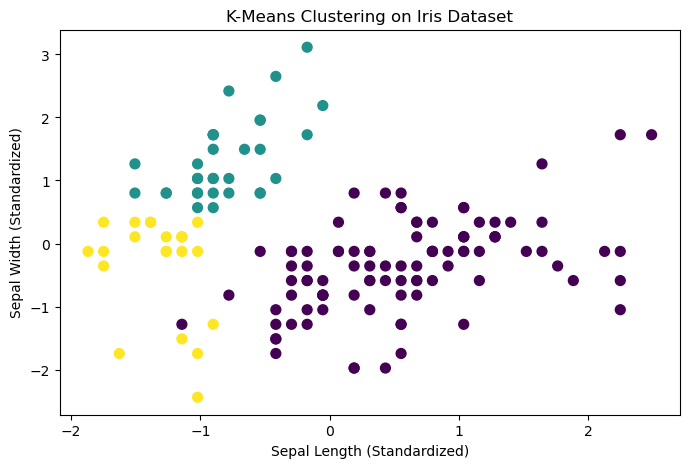

In [57]:
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel("Sepal Length (Standardized)")
plt.ylabel("Sepal Width (Standardized)")
plt.show()

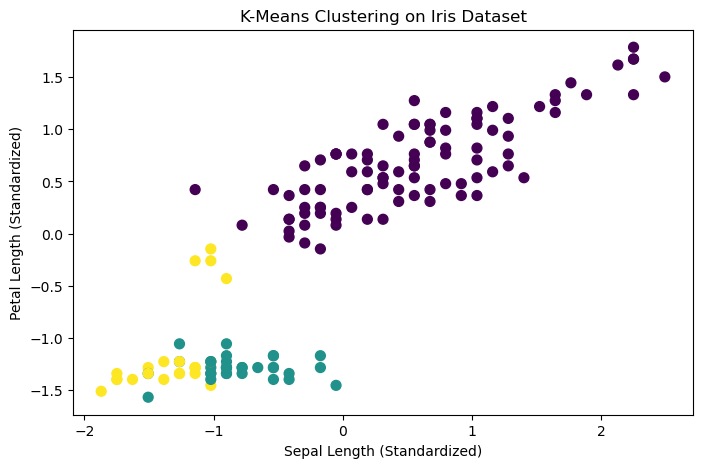

In [58]:
plt.figure(figsize=(8, 5))
plt.scatter(
X[:, 0], X[:, 2], # 1st feature (Sepal Length), 3rd feature (Petal Length)
c=df['Cluster'], cmap='viridis', s=50
)
plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel("Sepal Length (Standardized)")
plt.ylabel("Petal Length (Standardized)")
plt.show()


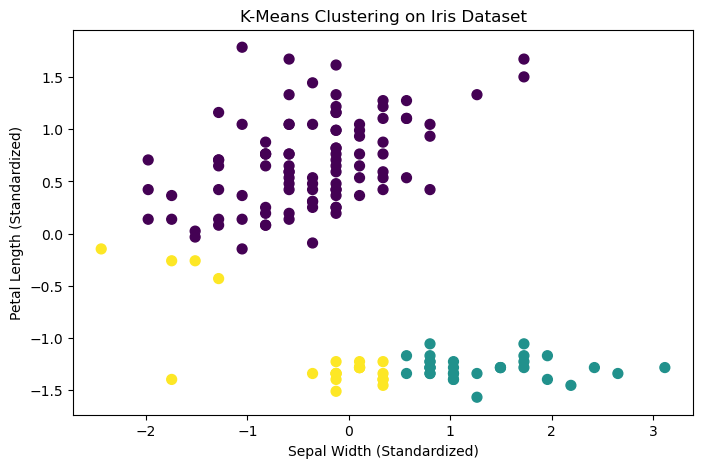

In [59]:
plt.figure(figsize=(8, 5))
plt.scatter(
X[:, 1], X[:, 2], # 2nd feature (Sepal Width), 3rd feature (Petal Length)
c=df['Cluster'], cmap='viridis', s=50
)
plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel("Sepal Width (Standardized)")
plt.ylabel("Petal Length (Standardized)")
plt.show()